# 🎯 Predicting Cancer Patient Survival using Machine Learning

## 📌 Project Overview

This project aims to build a **machine learning model** that predicts whether a cancer patient will survive based on their clinical and lifestyle features. The dataset includes demographic, medical, and treatment-related attributes for multiple patients from various countries.

---

## 📂 Dataset Overview

### ✅ Features:
- `age`, `gender`, `country`
- `diagnosis_date`, `end_treatment_date` → used to derive `treatment_duration_days`
- `cancer_stage`, `family_history`, `smoking_status`
- `bmi`, `cholesterol_level`
- Comorbidities: `hypertension`, `asthma`, `cirrhosis`, `other_cancer`
- `treatment_type`
- `survived` (target variable)

---

## 🎯 Objective

Predict the **`survived`** column (binary classification):
- `1` → Patient survived
- `0` → Patient did not survive

---



# 📌Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
df  = pd.read_csv("../Dataset/Lung_Cancer_Dataset_med.csv")


In [3]:
df

,Unnamed: 0,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64,Male,Sweden,4/5/2016,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,9/10/2017,0
1,2,50,Female,Netherlands,4/20/2023,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,6/17/2024,1
2,3,65,Female,Hungary,4/5/2023,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,4/9/2024,0
3,4,51,Female,Belgium,2/5/2016,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,4/23/2017,0
4,5,37,Male,Luxembourg,11/29/2023,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,1/8/2025,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889995,889996,40,Male,Malta,7/1/2022,Stage IV,No,Passive Smoker,44.8,243,1,1,1,0,Radiation,2/23/2023,0
889996,889997,62,Female,Cyprus,9/27/2015,Stage II,Yes,Former Smoker,21.6,240,0,0,0,0,Surgery,6/19/2017,0
889997,889998,48,Female,Estonia,3/27/2016,Stage III,Yes,Never Smoked,38.6,242,1,0,0,0,Combined,1/23/2017,1
889998,889999,67,Female,Slovakia,12/22/2015,Stage IV,Yes,Former Smoker,18.6,194,1,1,0,0,Chemotherapy,12/12/2017,0


In [4]:
try:
    isnull = df.isna().sum().sum()
    if isnull == 0:
        print("Dataset has no null value")
except :
    print("Dataset have some null value")

Dataset has no null value


In [5]:
df.describe()

,Unnamed: 0,age,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,survived
count,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000
mean,445000.500000,55.007008,30.494172,233.633916,0.750024,0.469740,0.225956,0.088157,0.220229
std,256921.014128,9.994485,8.368539,43.432278,0.432999,0.499084,0.418211,0.283524,0.414401
min,1.000000,4.000000,16.000000,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,222500.750000,48.000000,23.300000,196.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,445000.500000,55.000000,30.500000,242.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,667500.250000,62.000000,37.700000,271.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,890000.000000,104.000000,45.000000,300.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
info_df = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          890000 non-null  int64  
 1   age                 890000 non-null  int64  
 2   gender              890000 non-null  object 
 3   country             890000 non-null  object 
 4   diagnosis_date      890000 non-null  object 
 5   cancer_stage        890000 non-null  object 
 6   family_history      890000 non-null  object 
 7   smoking_status      890000 non-null  object 
 8   bmi                 890000 non-null  float64
 9   cholesterol_level   890000 non-null  int64  
 10  hypertension        890000 non-null  int64  
 11  asthma              890000 non-null  int64  
 12  cirrhosis           890000 non-null  int64  
 13  other_cancer        890000 non-null  int64  
 14  treatment_type      890000 non-null  object 
 15  end_treatment_date  890000 non-nul

In [7]:
info_df = pd.DataFrame({
    "Column": df.columns,
    "Non-Null Count": df.notnull().sum(),
    "Null Count": df.isnull().sum(),
    "Dtype": df.dtypes
}).reset_index(drop=True)

print(info_df)


                Column  Non-Null Count  Null Count    Dtype
0           Unnamed: 0          890000           0    int64
1                  age          890000           0    int64
2               gender          890000           0   object
3              country          890000           0   object
4       diagnosis_date          890000           0   object
5         cancer_stage          890000           0   object
6       family_history          890000           0   object
7       smoking_status          890000           0   object
8                  bmi          890000           0  float64
9    cholesterol_level          890000           0    int64
10        hypertension          890000           0    int64
11              asthma          890000           0    int64
12           cirrhosis          890000           0    int64
13        other_cancer          890000           0    int64
14      treatment_type          890000           0   object
15  end_treatment_date          890000  

In [8]:
int_columns = []
float_columns = []
object_columns = []

for col in df.columns:
    dtype = df[col].dtype
    if pd.api.types.is_integer_dtype(dtype):
        int_columns.append(col)
    elif pd.api.types.is_float_dtype(dtype):
        float_columns.append(col)
    elif pd.api.types.is_object_dtype(dtype):
        object_columns.append(col)

print("Integer Columns:", int_columns)
print("Float Columns:", float_columns)
print("Object Columns:", object_columns)


Integer Columns: ['Unnamed: 0', 'age', 'cholesterol_level', 'hypertension', 'asthma', 'cirrhosis', 'other_cancer', 'survived']
Float Columns: ['bmi']
Object Columns: ['gender', 'country', 'diagnosis_date', 'cancer_stage', 'family_history', 'smoking_status', 'treatment_type', 'end_treatment_date']


In [10]:
def explore_dataframe(df, sample_n=3, head_n=5, tail_n=5):
    print("🔹 Random Sample Row(s)")
    display(df.sample(sample_n))

    print("\n🔹 First Rows")
    display(df.head(head_n))

    print("\n🔹 Last Rows")
    display(df.tail(tail_n))

# Usage
explore_dataframe(df)


🔹 Random Sample Row(s)


,Unnamed: 0,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
702316,702317,58,Female,Croatia,4/27/2015,Stage II,No,Passive Smoker,32.0,260,1,0,1,0,Chemotherapy,6/22/2016,0
197855,197856,47,Female,Austria,7/12/2021,Stage II,No,Passive Smoker,21.0,161,1,0,0,0,Surgery,3/29/2023,0
776598,776599,46,Male,Hungary,3/28/2015,Stage I,No,Current Smoker,20.2,236,1,1,0,0,Chemotherapy,4/17/2016,1



🔹 First Rows


,Unnamed: 0,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64,Male,Sweden,4/5/2016,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,9/10/2017,0
1,2,50,Female,Netherlands,4/20/2023,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,6/17/2024,1
2,3,65,Female,Hungary,4/5/2023,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,4/9/2024,0
3,4,51,Female,Belgium,2/5/2016,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,4/23/2017,0
4,5,37,Male,Luxembourg,11/29/2023,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,1/8/2025,0



🔹 Last Rows


,Unnamed: 0,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
889995,889996,40,Male,Malta,7/1/2022,Stage IV,No,Passive Smoker,44.8,243,1,1,1,0,Radiation,2/23/2023,0
889996,889997,62,Female,Cyprus,9/27/2015,Stage II,Yes,Former Smoker,21.6,240,0,0,0,0,Surgery,6/19/2017,0
889997,889998,48,Female,Estonia,3/27/2016,Stage III,Yes,Never Smoked,38.6,242,1,0,0,0,Combined,1/23/2017,1
889998,889999,67,Female,Slovakia,12/22/2015,Stage IV,Yes,Former Smoker,18.6,194,1,1,0,0,Chemotherapy,12/12/2017,0
889999,890000,55,Female,Malta,7/26/2021,Stage II,Yes,Current Smoker,42.8,250,0,0,0,0,Combined,10/19/2022,0


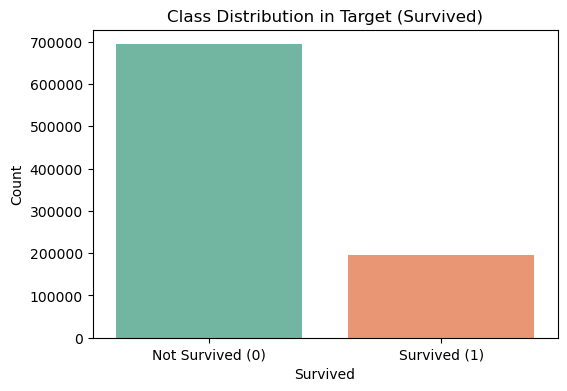


Class Distribution:
survived
0    77.977079
1    22.022921
Name: proportion, dtype: float64


In [32]:
### 📉 Explore Class Imbalance
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot for the 'survived' column
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='survived', palette='Set2')
plt.title("Class Distribution in Target (Survived)")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.xticks([0, 1], ['Not Survived (0)', 'Survived (1)'])
plt.show()

# Print value counts
print("\nClass Distribution:")
print(df['survived'].value_counts(normalize=True) * 100)


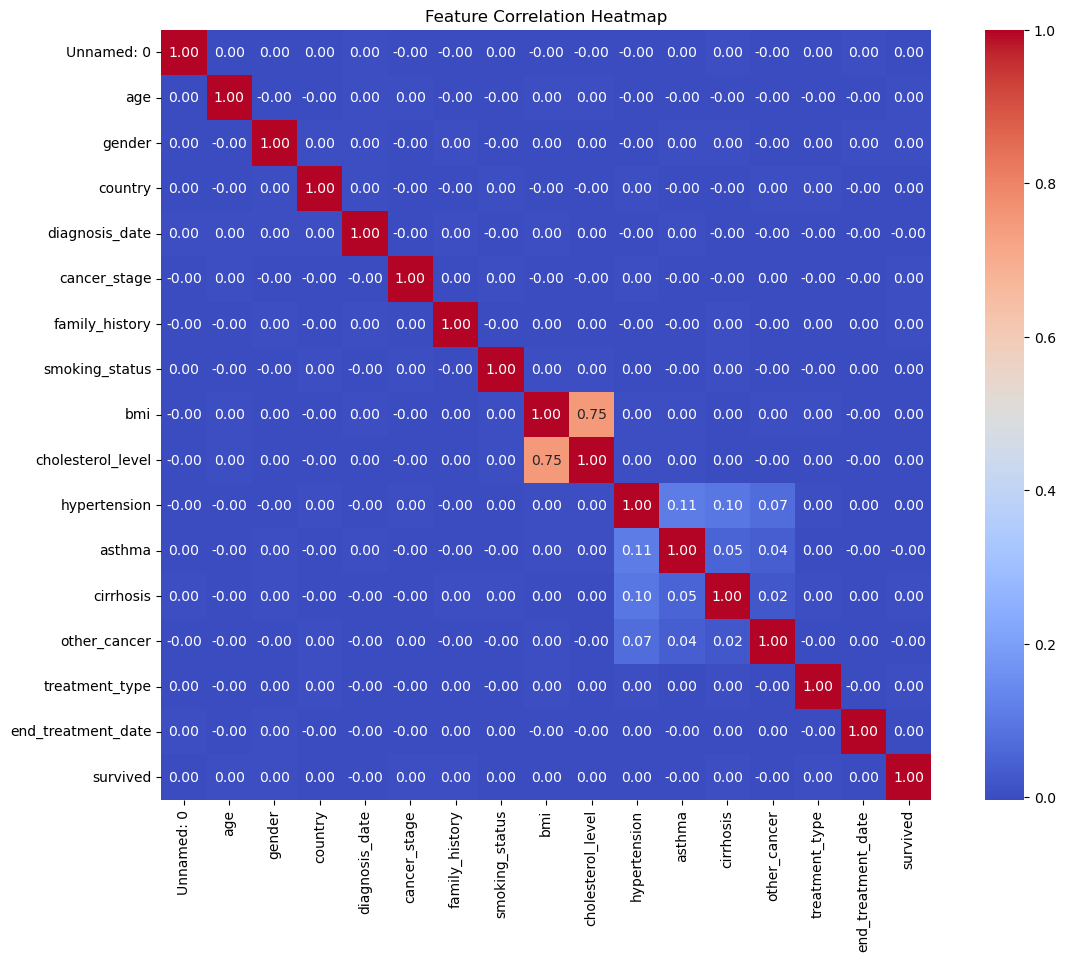

In [15]:
from sklearn.preprocessing import LabelEncoder

# Copy the dataframe to avoid altering original
df_corr = df.copy()

# Convert object (categorical) columns to numeric using Label Encoding
for col in df_corr.select_dtypes(include='object').columns:
    df_corr[col] = LabelEncoder().fit_transform(df_corr[col])

# Correlation matrix
plt.figure(figsize=(14,10))
sns.heatmap(df_corr.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Feature Correlation Heatmap")
plt.show()


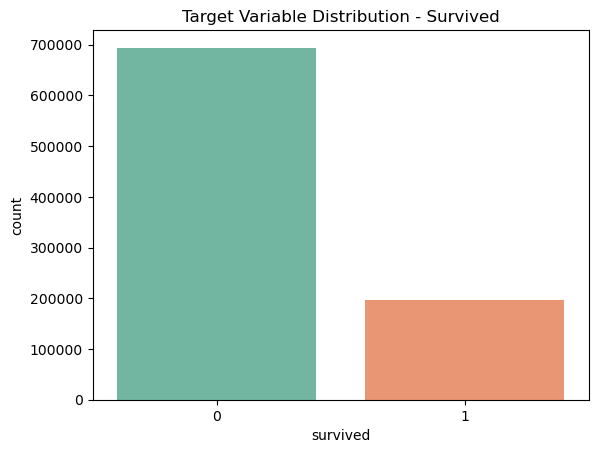

In [16]:
### Target Variable Distribution (Class Balance)**
sns.countplot(data=df, x='survived', palette='Set2')
plt.title("Target Variable Distribution - Survived")
plt.show()

In [21]:
# Percentage
df['survived'].value_counts(normalize=True) * 100

survived
0    77.977079
1    22.022921
Name: proportion, dtype: float64

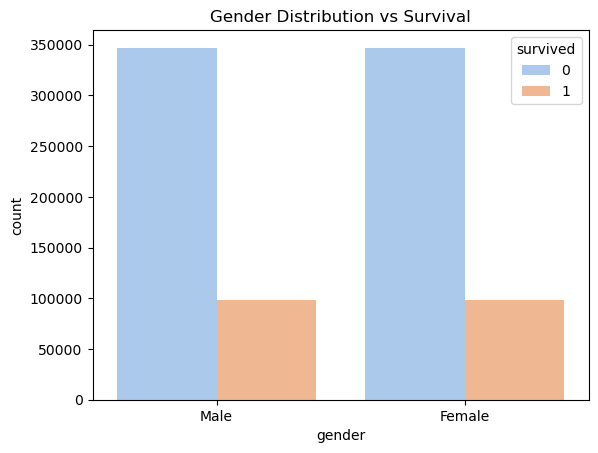

In [22]:
## 🚻 **4. Gender Distribution**

sns.countplot(data=df, x='gender', hue='survived', palette='pastel')
plt.title("Gender Distribution vs Survival")
plt.show()

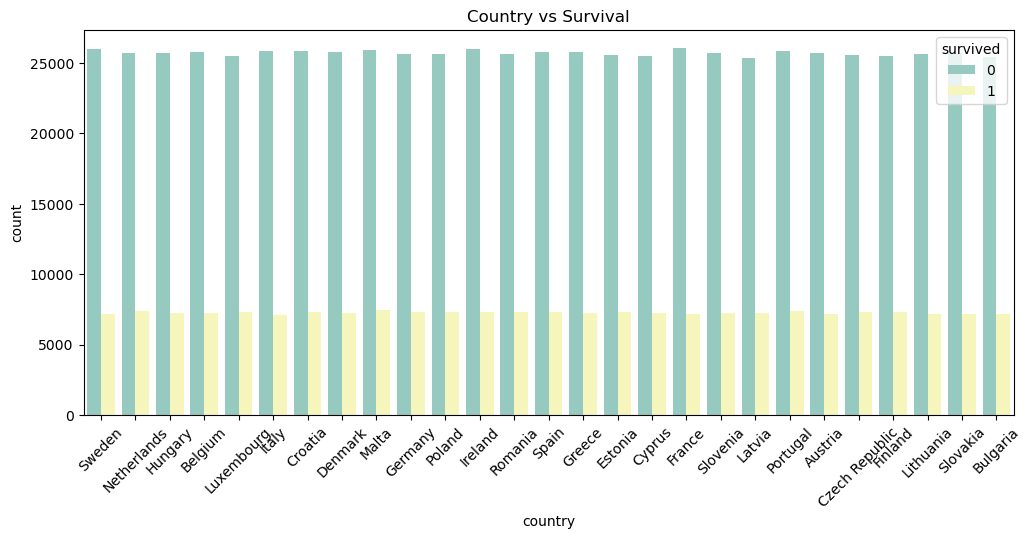

In [23]:
## 🌍 **5. Country-wise Survival**

plt.figure(figsize=(12,5))
sns.countplot(data=df, x='country', hue='survived', palette='Set3')
plt.title("Country vs Survival")
plt.xticks(rotation=45)
plt.show()


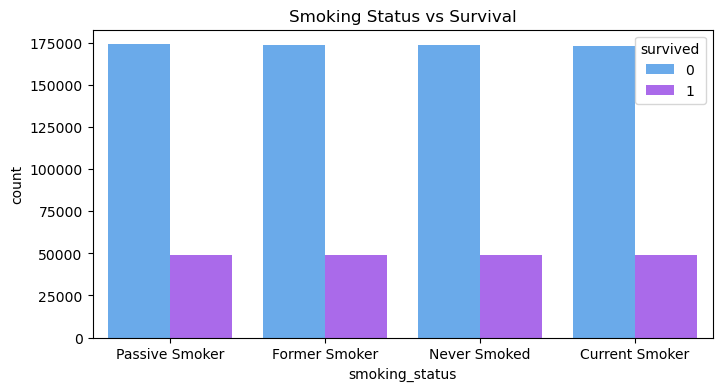

In [24]:
## 🚬 **6. Smoking Status**

plt.figure(figsize=(8,4))
sns.countplot(data=df, x='smoking_status', hue='survived', palette='cool')
plt.title("Smoking Status vs Survival")
plt.show()

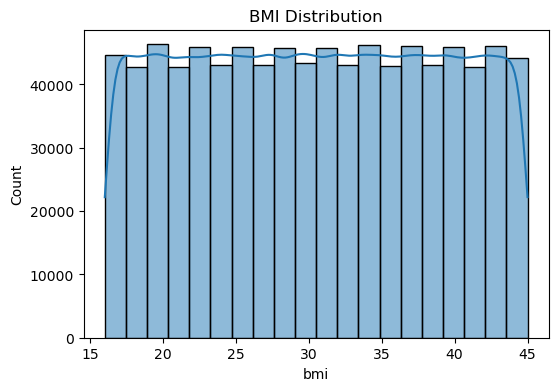

In [25]:

## 📈 **7. BMI Distribution**

plt.figure(figsize=(6,4))
sns.histplot(df['bmi'], kde=True, bins=20)
plt.title("BMI Distribution")
plt.show()


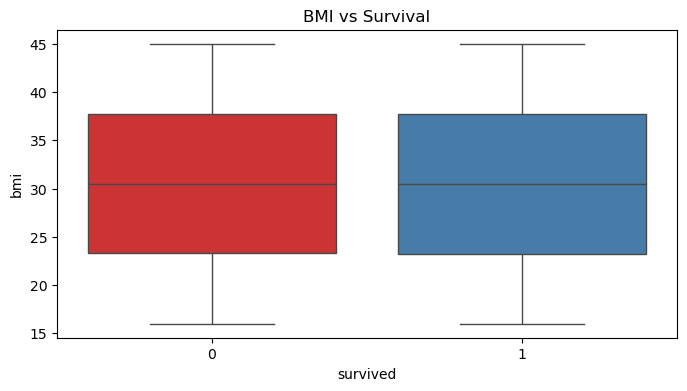

In [26]:
# BMI vs Survival
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x='survived', y='bmi', palette='Set1')
plt.title("BMI vs Survival")
plt.show()


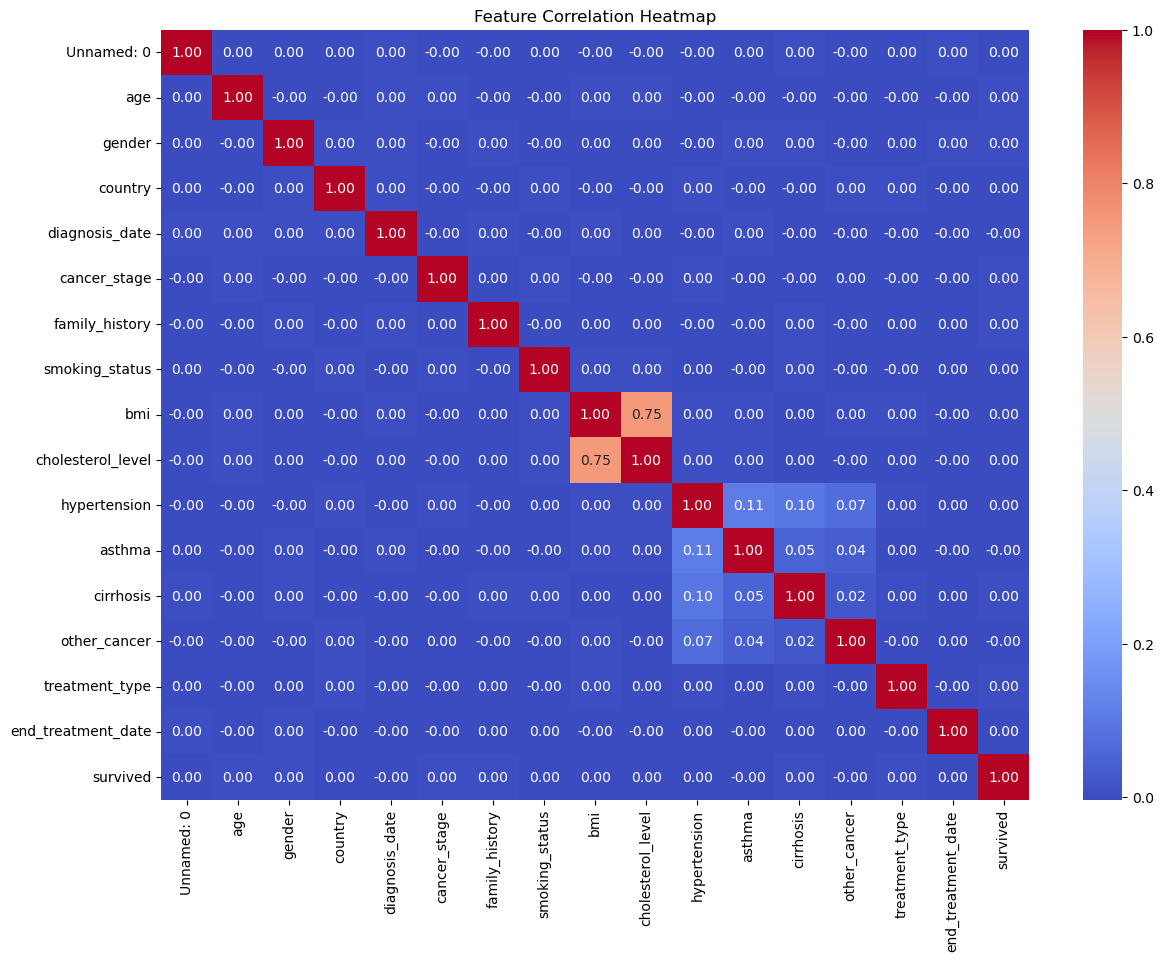

In [27]:
## ❤️ **8. Correlation Heatmap (Numerical Features Only)**


from sklearn.preprocessing import LabelEncoder

df_corr = df.copy()
for col in df_corr.select_dtypes(include='object').columns:
    df_corr[col] = LabelEncoder().fit_transform(df_corr[col])

plt.figure(figsize=(14,10))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


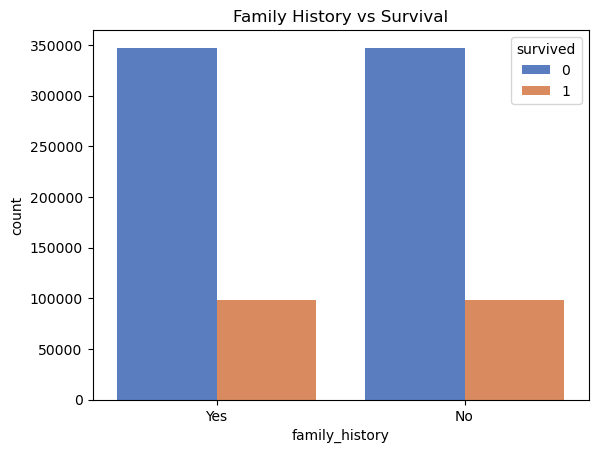

In [28]:
## 🧾 **9. Family History vs Survival**

sns.countplot(data=df, x='family_history', hue='survived', palette='muted')
plt.title("Family History vs Survival")
plt.show()

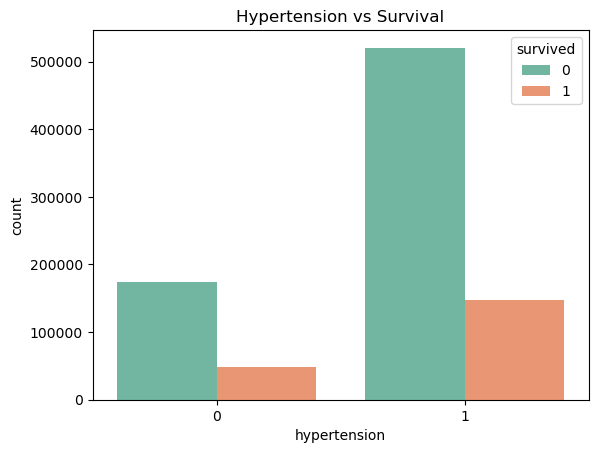

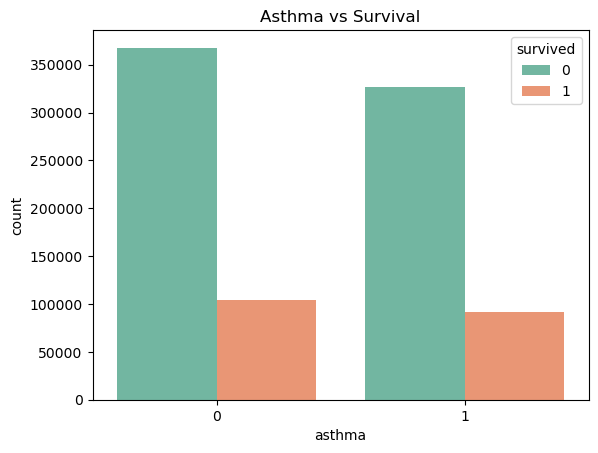

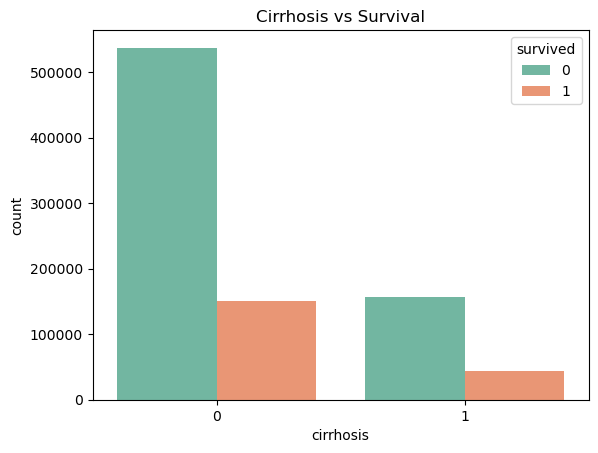

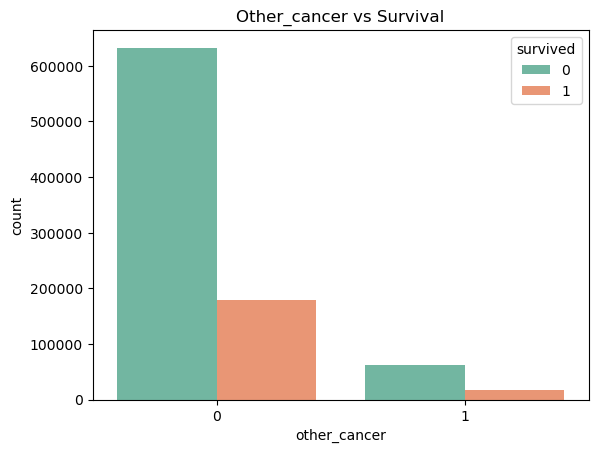

In [29]:
## 🩺 **10. Comorbidities Analysis**


comorbidities = ['hypertension', 'asthma', 'cirrhosis', 'other_cancer']

for condition in comorbidities:
    sns.countplot(data=df, x=condition, hue='survived', palette='Set2')
    plt.title(f"{condition.capitalize()} vs Survival")
    plt.show()


In [30]:

## 📅 **11. Diagnosis Date & Treatment Duration**
# Convert date columns
df['diagnosis_date'] = pd.to_datetime(df['diagnosis_date'])
df['end_treatment_date'] = pd.to_datetime(df['end_treatment_date'])

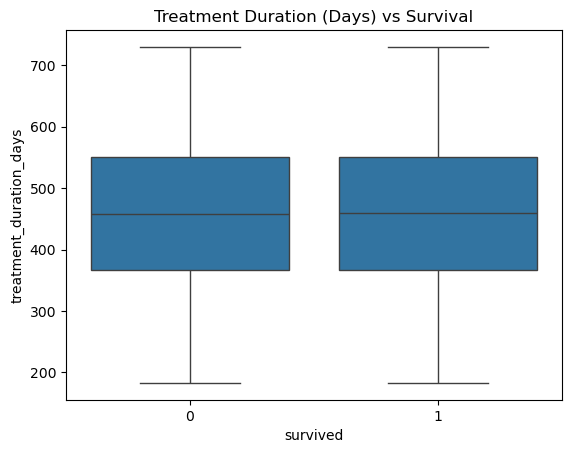

In [31]:
# Treatment duration
df['treatment_duration_days'] = (df['end_treatment_date'] - df['diagnosis_date']).dt.days

# Plot duration
sns.boxplot(data=df, x='survived', y='treatment_duration_days')
plt.title("Treatment Duration (Days) vs Survival")
plt.show()